In [35]:
import pandas as pd
import numpy as np
import re
%matplotlib inline

In [2]:
matches = pd.read_csv('Data/matches.csv', index_col='Index')
teams50 = pd.read_csv('Data/teams_stats_Top50.csv', index_col=False)
teams30 = pd.read_csv('Data/teams_stats_Top30.csv', index_col=False)
teamsAll = pd.read_csv('Data/teams_stats_All.csv', index_col=False)
teams_pistols_50 = pd.read_csv('Data/teams_pistols_stats_Top50.csv', index_col=False)
teams_pistols_30 = pd.read_csv('Data/teams_pistols_stats_Top30.csv', index_col=False)
teams_pistols_All = pd.read_csv('Data/teams_pistols_stats_All.csv', index_col=False)

In [3]:
matches

,Date,Team1,Team2,Team1_country,Team2_country,Map,Team1_Score,Team2_Score,Event
Index,,,,,,,,,
0,13/11/21,fnatic,MAD Lions,United Kingdom,Europe,Ancient,16,14,DreamHack Open November 2021
1,12/11/21,forZe,ENCE,Russia,Europe,Mirage,16,10,DreamHack Open November 2021
2,12/11/21,forZe,ENCE,Russia,Europe,Nuke,16,8,DreamHack Open November 2021
3,12/11/21,ENCE,forZe,Europe,Russia,Ancient,16,7,DreamHack Open November 2021
4,12/11/21,1WIN,Nemiga,Russia,Belarus,Nuke,6,16,ESEA Premier Season 39 Europe
...,...,...,...,...,...,...,...,...,...
5461,13/11/20,Envy,MIBR,Europe,Brazil,Nuke,12,16,Flashpoint 2
5462,13/11/20,ENCE,Astralis,Finland,Denmark,Inferno,4,16,IEM Beijing-Haidian 2020 Europe
5463,13/11/20,Astralis,ENCE,Denmark,Finland,Dust2,16,11,IEM Beijing-Haidian 2020 Europe


In [4]:
matches['Total_rounds'] = matches['Team1_Score'] + matches['Team2_Score']

In [5]:
matches['rnd_diff'] = matches['Team1_Score'] - matches['Team2_Score']

In [6]:
matches['winner'] = np.where(matches['rnd_diff'] > 0, 1, 2)

In [7]:
matches.Date = pd.to_datetime(matches['Date'], dayfirst=True)
teams30.Date = pd.to_datetime(teams30['Date'], dayfirst=True)
teams50.Date = pd.to_datetime(teams50['Date'], dayfirst=True)
teamsAll.Date = pd.to_datetime(teamsAll['Date'], dayfirst=True)
teams_pistols_50 = pd.to_datetime(teams_pistols_50['Date'], dayfirst=True)
teams_pistols_30 = pd.to_datetime(teams_pistols_30['Date'], dayfirst=True)
teams_pistols_All = pd.to_datetime(teams_pistols_All['Date'], dayfirst=True)

In [8]:
ch_big_matches = pd.read_csv('Data/Tyloo.csv', index_col='Index')
ch_all_matches = pd.read_csv('Data/Tyloo_all.csv', index_col='Index')
eu_big_matches = pd.read_csv('Data/Mouz_big.csv', index_col='Index')
eu_all_matches = pd.read_csv('Data/Mouz_all.csv', index_col='Index')

In [9]:
index = ch_all_matches.Result.loc[lambda x: x=='T'].index
ch_all_matches.drop(index=index, inplace=True)
indexes = eu_all_matches.Result.loc[lambda x: x=='T'].index
eu_all_matches.drop(index=indexes, inplace=True)

In [10]:
plot_chbig = ch_big_matches['Result'].value_counts(normalize=True, sort=False) * 100
plot_chall = ch_all_matches['Result'].value_counts(normalize=True) * 100
plot_eubig = eu_big_matches['Result'].value_counts(normalize=True, sort=False) * 100
plot_euall = eu_all_matches['Result'].value_counts(normalize=True) * 100

## Результаты топ 1 команды Азии

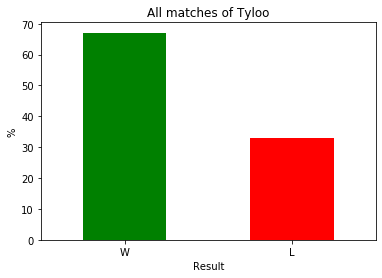

In [11]:
plot_chall.plot(kind='bar', title='All matches of Tyloo', xlabel='Result', ylabel='%', rot=0, color=['g', 'r'])

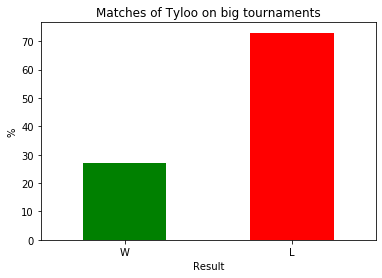

In [12]:
plot_chbig.plot(kind='bar', title='Matches of Tyloo on big tournaments', xlabel='Result', ylabel='%', rot=0, color=['g', 'r'])

## Результаты топ 20 команды Европы

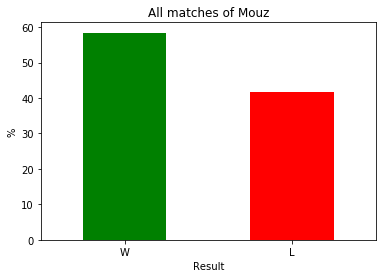

In [13]:
plot_euall.plot(kind='bar', title='All matches of Mouz', xlabel='Result', ylabel='%', rot=0, color=['g', 'r'])

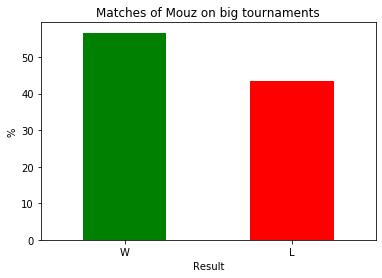

In [14]:
plot_eubig.plot(kind='bar', title='Matches of Mouz on big tournaments', xlabel='Result', ylabel='%', rot=0, color=['g', 'r'])

# Добавление регионов команд

In [15]:
pd.unique(matches.Team2_country)

array(['Europe', 'Russia', 'Belarus', 'Denmark', 'Sweden',
       'United Kingdom', 'France', 'Germany', 'Czech Republic',
       'Bulgaria', 'Spain', 'Albania', 'Poland', 'North America',
       'Brazil', 'CIS', 'United States', 'Australia', 'China',
       'South America', 'Kazakhstan', 'Finland', 'Oceania', 'Ukraine',
       'Portugal', 'Norway', 'Turkey', 'Hungary', 'Romania'], dtype=object)

In [16]:
EU = ['United Kingdom', 'Europe', 'Sweden',
       'Denmark', 'France', 'Germany', 'Czech Republic', 'Bulgaria',
       'Spain', 'Albania', 'Poland', 'Finland',
       'Norway', 'Portugal', 'Turkey', 'Hungary', 'Romania']
CIS = ['Russia', 'Belarus', 'CIS', 'Ukraine','Kazakhstan']
NA = ['North America', 'United States']
SA = ['Brazil', 'South America']
Oceania = ['Oceania', 'Australia']
Asia = ['China']

In [17]:
def get_regions1(s):
    if (s['Team1_country'] in EU):
        return 'EU'
    elif (s['Team1_country'] in CIS):
        return 'CIS'
    elif (s['Team1_country'] in NA):
        return 'N_A'
    elif (s['Team1_country'] in SA):
        return 'SA'
    elif (s['Team1_country'] in Oceania):
        return 'Oceania'
    elif (s['Team1_country'] in Asia):
        return 'Asia'

In [18]:
matches['Team1_region'] = matches.apply(get_regions1, axis=1)

In [19]:
def get_regions2(s):
    if (s['Team2_country'] in EU):
        return 'EU'
    elif (s['Team2_country'] in CIS):
        return 'CIS'
    elif (s['Team2_country'] in NA):
        return 'N_A'
    elif (s['Team2_country'] in SA):
        return 'SA'
    elif (s['Team2_country'] in Oceania):
        return 'Oceania'
    elif (s['Team2_country'] in Asia):
        return 'Asia'

In [20]:
matches['Team2_region'] = matches.apply(get_regions2, axis=1)

# Добавление престижности турниров

In [21]:
events_from_csv = pd.read_csv('Data/events.csv', index_col='Index')

In [22]:
events_from_csv

,Event,Teams_number,Prize,Type
Index,,,,
0,IQ Option Latin America Cup 2021 Finals,2,15000,Local LAN
1,Polish Esport League Autumn 2021 Finals,4,24287,Local LAN
2,Pinnacle Fall Series 3,20,68000,Online
3,Vodafone Czech Championship 2021,4+,18500,Local LAN
4,OMEN WGR Retake Season 3,4+,14179,Online
...,...,...,...,...
197,IEM Beijing-Haidian 2020 North America,8,70000,Online
198,IEM Beijing-Haidian 2020 Europe,16,150000,Online
199,OGA Counter PIT by AMD and Sapphire Season 8,8,15000,Online


In [23]:
def get_priority(s):
    if (s['Prize'] >= 250000):
        return 4
    elif (s['Prize'] >= 100000):
        return 3
    elif (s['Prize'] >= 50000):
        return 2
    else:
        return 1

In [24]:
events_from_csv['Importance'] = events_from_csv.apply(get_priority, axis=1)

In [69]:
events_from_matches = pd.Series(pd.unique(matches['Event']))

In [70]:
events_from_matches = events_from_matches.to_frame(name='Event')

In [71]:
events = pd.merge(left = events_from_matches, right = events_from_csv, how='left', on='Event')

In [72]:
events.drop(columns=['Teams_number', 'Prize', 'Type'], inplace=True)

In [40]:
def priority_by_name(df):
    if re.search(r'BLAST|IEM|PGL|StarLadder|DreamHack', df.Event):
        return 2
    else:
        return 1

In [74]:
events.Importance[events.isnull().any(axis=1)] = events.apply(priority_by_name, axis = 1)

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [80]:
matches = pd.merge(left = matches, right = events, how= 'inner', on='Event')

In [81]:
matches.to_csv('Data/matches_extended2.csv')

# Составление основного датасета 

In [82]:
df = matches.drop(columns=['Team1_Score','Team2_Score','Team1_country','Team2_country', 'Event','rnd_diff'])

In [83]:
df

,Date,Team1,Team2,Map,Total_rounds,winner,Team1_region,Team2_region,Importance
0,2021-11-13,fnatic,MAD Lions,Ancient,30,1,EU,EU,3.0
1,2021-11-12,forZe,ENCE,Mirage,26,1,CIS,EU,3.0
2,2021-11-12,forZe,ENCE,Nuke,24,1,CIS,EU,3.0
3,2021-11-12,ENCE,forZe,Ancient,23,1,EU,CIS,3.0
4,2021-11-12,MAD Lions,MOUZ,Nuke,24,1,EU,EU,3.0
...,...,...,...,...,...,...,...,...,...
5461,2020-11-15,Espada,Gambit,Overpass,22,2,CIS,CIS,2.0
5462,2020-11-15,Espada,Gambit,Train,25,2,CIS,CIS,2.0
5463,2020-11-15,Gambit,Espada,Mirage,30,2,CIS,CIS,2.0
5464,2020-11-15,SKADE,Espada,Nuke,27,2,EU,CIS,2.0


## Актуализация названий команд

In [84]:
pd.unique(teams30.Team)

array(['Natus Vincere', 'fnatic', 'G2', 'Lyngby Vikings', 'Heroic',
       'FaZe', 'FunPlus Phoenix', 'Gambit', 'FURIA', 'Virtus.pro',
       'Copenhagen Flames', 'Entropiq', 'MOUZ', 'MAD Lions', 'Vitality',
       'Liquid', 'ENCE', 'BIG', 'Astralis', 'Movistar Riders', '1WIN',
       'NIP', 'Spirit', 'Fiend', 'SKADE', 'paiN', 'K23', 'GODSENT', 'OG',
       'Sinners', 'Dignitas', 'Complexity', 'Endpoint', 'Extra Salt',
       'AGO', 'DBL PONEY', 'Evil Geniuses', 'forZe', 'HAVU', 'Akuma',
       'Renegades', 'SAW', 'Sprout', 'EXTREMUM', 'O PLANO', 'EPG Family',
       'ex-Winstrike', 'MIBR', 'Cloud9', 'Winstrike', 'Nemiga', 'Chaos',
       'Triumph', 'North', 'TeamOne', 'Espada'], dtype=object)

Команда Entropiq полностью сменила состав в июне (в нее перешли все игроки из команды Winstrike).

In [85]:
teams30 = teams30.drop(teams30[(teams30['Team'] == 'Winstrike') & (teams30['Date'] > '2021-04-17')].index)
teams30 = teams30.drop(teams30[(teams30['Team'] == 'Entropiq') & (teams30['Date'] <= '2021-06-30')].index)
teams50 = teams50.drop(teams50[(teams50['Team'] == 'Winstrike') & (teams50['Date'] > '2021-04-17')].index)
teams50 = teams50.drop(teams50[(teams50['Team'] == 'Entropiq') & (teams50['Date'] <= '2021-06-30')].index)
teamsAll = teamsAll.drop(teamsAll[(teamsAll['Team'] == 'Entropiq') & (teamsAll['Date'] <= '2021-06-30')].index)
teamsAll = teamsAll.drop(teamsAll[(teamsAll['Team'] == 'Winstrike') & (teamsAll['Date'] > '2021-04-17')].index)
#Удаляем статистику команды Winstrike после смены названия, удаляем статистику команды Entropiq до смены состава 

In [86]:
teams30['Team'].iloc[(teams30['Team'] == 'Winstrike')] = 'Entropiq'
teams30['Team'].iloc[(teams30['Team'] == 'ex-Winstrike')] = 'Entropiq'
teams50['Team'].iloc[(teams50['Team'] == 'Winstrike')] = 'Entropiq'
teams50['Team'].iloc[(teams50['Team'] == 'ex-Winstrike')] = 'Entropiq'
teamsAll['Team'].iloc[(teamsAll['Team'] == 'Winstrike')] = 'Entropiq'
teamsAll['Team'].iloc[(teamsAll['Team'] == 'ex-Winstrike')] = 'Entropiq'
#Меняем старые названия на новое

C:\Users\LENOVO\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [87]:
teams30['Team'].iloc[(teams30['Team'] == 'Gambit Youngsters')] = 'Gambit'
teams50['Team'].iloc[(teams50['Team'] == 'Gambit Youngsters')] = 'Gambit'
teamsAll['Team'].iloc[(teamsAll['Team'] == 'Gambit Youngsters')] = 'Gambit'
#Так как произошла только смена названия (Команды Gambit до этого не было), то удалять ничего не нужно

In [88]:
pd.unique(teams30.Team)

array(['Natus Vincere', 'fnatic', 'G2', 'Lyngby Vikings', 'Heroic',
       'FaZe', 'FunPlus Phoenix', 'Gambit', 'FURIA', 'Virtus.pro',
       'Copenhagen Flames', 'Entropiq', 'MOUZ', 'MAD Lions', 'Vitality',
       'Liquid', 'ENCE', 'BIG', 'Astralis', 'Movistar Riders', '1WIN',
       'NIP', 'Spirit', 'Fiend', 'SKADE', 'paiN', 'K23', 'GODSENT', 'OG',
       'Sinners', 'Dignitas', 'Complexity', 'Endpoint', 'Extra Salt',
       'AGO', 'DBL PONEY', 'Evil Geniuses', 'forZe', 'HAVU', 'Akuma',
       'Renegades', 'SAW', 'Sprout', 'EXTREMUM', 'O PLANO', 'EPG Family',
       'MIBR', 'Cloud9', 'Nemiga', 'Chaos', 'Triumph', 'North', 'TeamOne',
       'Espada'], dtype=object)

In [89]:
df['Team1'].iloc[(df['Team1'] == 'Winstrike')] = 'Entropiq'
df['Team1'].iloc[(df['Team1'] == 'ex-Winstrike')] = 'Entropiq'

In [90]:
df['Team2'].iloc[(df['Team2'] == 'Winstrike')] = 'Entropiq'
df['Team2'].iloc[(df['Team2'] == 'ex-Winstrike')] = 'Entropiq'

In [91]:
df['Team1'].iloc[(df['Team1'] == 'Gambit Youngsters')] = 'Gambit'
df['Team2'].iloc[(df['Team2'] == 'Gambit Youngsters')] = 'Gambit'

In [92]:
df

,Date,Team1,Team2,Map,Total_rounds,winner,Team1_region,Team2_region,Importance
0,2021-11-13,fnatic,MAD Lions,Ancient,30,1,EU,EU,3.0
1,2021-11-12,forZe,ENCE,Mirage,26,1,CIS,EU,3.0
2,2021-11-12,forZe,ENCE,Nuke,24,1,CIS,EU,3.0
3,2021-11-12,ENCE,forZe,Ancient,23,1,EU,CIS,3.0
4,2021-11-12,MAD Lions,MOUZ,Nuke,24,1,EU,EU,3.0
...,...,...,...,...,...,...,...,...,...
5461,2020-11-15,Espada,Gambit,Overpass,22,2,CIS,CIS,2.0
5462,2020-11-15,Espada,Gambit,Train,25,2,CIS,CIS,2.0
5463,2020-11-15,Gambit,Espada,Mirage,30,2,CIS,CIS,2.0
5464,2020-11-15,SKADE,Espada,Nuke,27,2,EU,CIS,2.0


## Добавление статистики 

In [93]:
teams_stats = teams30.append([teams50, teamsAll])#объединяем статистику в один df

In [94]:
teams_stats

,Date,Team,Map Count,K/D Diff.,K/D,Rating
0,2021-11-12,Natus Vincere,10,245,1.34,1.23
1,2021-11-12,fnatic,10,155,1.20,1.17
2,2021-11-12,G2,17,198,1.14,1.13
3,2021-11-12,Lyngby Vikings,16,60,1.04,1.08
4,2021-11-12,Heroic,25,141,1.07,1.07
...,...,...,...,...,...,...
17040,2020-11-14,fnatic,30,-159,0.94,1.00
17041,2020-11-14,Paradox,24,-110,0.95,0.99
17042,2020-11-14,AGO,20,-173,0.91,0.99
17043,2020-11-14,FATE,28,-300,0.89,0.96


In [95]:
teams_stats = teams_stats.drop_duplicates(subset=['Date', 'Team'], keep='last')
#Удаляем несколько записей за одну дату для одной и той же команды

In [96]:
teams_stats

,Date,Team,Map Count,K/D Diff.,K/D,Rating
0,2021-11-12,Natus Vincere,10,245,1.34,1.23
8,2021-11-12,FURIA,11,19,1.02,1.05
23,2021-11-11,Natus Vincere,10,245,1.34,1.23
48,2021-11-10,Natus Vincere,10,245,1.34,1.23
72,2021-11-09,Natus Vincere,10,245,1.34,1.23
...,...,...,...,...,...,...
17040,2020-11-14,fnatic,30,-159,0.94,1.00
17041,2020-11-14,Paradox,24,-110,0.95,0.99
17042,2020-11-14,AGO,20,-173,0.91,0.99
17043,2020-11-14,FATE,28,-300,0.89,0.96


### Для первой команды 

In [97]:
new_df = pd.merge(df, teams_stats,  how='left', left_on=['Date','Team1'], right_on = ['Date','Team'])

In [98]:
new_df

,Date,Team1,Team2,Map,Total_rounds,winner,Team1_region,Team2_region,Importance,Team,Map Count,K/D Diff.,K/D,Rating
0,2021-11-13,fnatic,MAD Lions,Ancient,30,1,EU,EU,3.0,NaN,NaN,NaN,NaN,NaN
1,2021-11-12,forZe,ENCE,Mirage,26,1,CIS,EU,3.0,forZe,20.0,65.0,1.04,1.05
2,2021-11-12,forZe,ENCE,Nuke,24,1,CIS,EU,3.0,forZe,20.0,65.0,1.04,1.05
3,2021-11-12,ENCE,forZe,Ancient,23,1,EU,CIS,3.0,ENCE,29.0,-79.0,0.97,1.01
4,2021-11-12,MAD Lions,MOUZ,Nuke,24,1,EU,EU,3.0,MAD Lions,27.0,102.0,1.04,1.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5461,2020-11-15,Espada,Gambit,Overpass,22,2,CIS,CIS,2.0,Espada,35.0,254.0,1.09,1.10
5462,2020-11-15,Espada,Gambit,Train,25,2,CIS,CIS,2.0,Espada,35.0,254.0,1.09,1.10
5463,2020-11-15,Gambit,Espada,Mirage,30,2,CIS,CIS,2.0,Gambit,33.0,686.0,1.30,1.23
5464,2020-11-15,SKADE,Espada,Nuke,27,2,EU,CIS,2.0,SKADE,33.0,277.0,1.09,1.11


In [99]:
new_df.rename(columns={'Map Count': 'T1_map_count', 'K/D Diff.': 'T1_K/D_Diff', 'K/D':'T1_K/D', 
                      'Rating':'T1_rating'}, inplace=True)

In [100]:
teams_without_stats = pd.unique(new_df.Team1[new_df['Team'].isna()])#узнаем команды, для которых нет статистики на данную дату
teams_with_stats = pd.unique(teams_stats.Team)#команды, на которые есть статистика (хотя бы на одну дату)

In [101]:
teams_without_stats = (set(teams_without_stats) - set(teams_with_stats)) #команды, на которые нет статистики ни на одну дату

In [102]:
teams_without_stats

{'Gen.G',
 'Marlian',
 'Tutsis Angels',
 'WaitForTag',
 'ex-100PG',
 'ex-Cloud9',
 'kingkongflowers'}

In [103]:
new_df = new_df.drop(new_df[(new_df.apply(lambda x :  x['Team1'] in teams_without_stats,1))
                            | (new_df.apply(lambda x :  x['Team2'] in teams_without_stats,1))].index)#удаляем записи с командами без статистики

In [104]:
empty_rows = new_df[new_df['Team'].isna()]#записи с командами без статистики на дату матча

In [105]:
empty_rows

,Date,Team1,Team2,Map,Total_rounds,winner,Team1_region,Team2_region,Importance,Team,T1_map_count,T1_K/D_Diff,T1_K/D,T1_rating
0,2021-11-13,fnatic,MAD Lions,Ancient,30,1,EU,EU,3.0,NaN,NaN,NaN,NaN,NaN
38,2021-11-09,Sprout,BLINK,Overpass,30,1,EU,EU,1.0,NaN,NaN,NaN,NaN,NaN
61,2021-09-21,EXTREMUM,Dignitas,Nuke,48,1,Oceania,EU,3.0,NaN,NaN,NaN,NaN,NaN
66,2021-09-20,EXTREMUM,Dignitas,Nuke,27,2,Oceania,EU,3.0,NaN,NaN,NaN,NaN,NaN
96,2021-10-13,MOUZ NXT,HAVU,Dust2,26,1,EU,EU,2.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5456,2020-11-13,HellRaisers,AGO,Inferno,23,1,CIS,EU,1.0,NaN,NaN,NaN,NaN,NaN
5457,2020-11-13,AGO,HellRaisers,Dust2,29,1,EU,CIS,1.0,NaN,NaN,NaN,NaN,NaN
5458,2020-11-13,HellRaisers,AGO,Overpass,27,1,CIS,EU,1.0,NaN,NaN,NaN,NaN,NaN
5459,2020-11-13,Espada,Secret,Inferno,25,2,CIS,EU,1.0,NaN,NaN,NaN,NaN,NaN


In [106]:
new_df = new_df.dropna()

In [107]:
empty_rows = empty_rows.drop(columns=['Team', 'T1_map_count', 'T1_K/D_Diff','T1_K/D','T1_rating'])

In [108]:
teams_to_get_stats = pd.unique(empty_rows.Team1)#список команд без статистики на дату матча

In [109]:
teams_with_updated_stats = pd.DataFrame(columns=['Date', 'Team1', 'Team2', 'Map', 'winner', 'Team',
                                                'Map Count', 'K/D Diff.', 'K/D', 'Rating'])

In [110]:
for team in teams_to_get_stats:
    temp_df = pd.merge_asof(empty_rows[empty_rows.Team1 == team].sort_values('Date')
                  , teams_stats[teams_stats.Team == team].sort_values('Date'), on='Date', direction='backward').sort_values('Date')
    temp_df = temp_df.dropna()
    teams_with_updated_stats = teams_with_updated_stats.append(temp_df)
#берем статистику команд на ближайшую дату, которая предшествует дате матча

In [111]:
teams_with_updated_stats

,Date,Team1,Team2,Map,winner,Team,Map Count,K/D Diff.,K/D,Rating,Total_rounds,Team1_region,Team2_region,Importance
0,2021-01-25,fnatic,Complexity,Mirage,1,fnatic,14,153,1.13,1.12,28.0,EU,EU,3.0
1,2021-03-25,fnatic,Liquid,Vertigo,2,fnatic,13,-113,0.91,0.98,23.0,EU,N_A,4.0
2,2021-03-26,fnatic,Endpoint,Inferno,2,fnatic,13,-113,0.91,0.98,25.0,EU,EU,4.0
3,2021-03-27,fnatic,Evil Geniuses,Inferno,2,fnatic,13,-113,0.91,0.98,23.0,EU,N_A,4.0
4,2021-03-28,fnatic,Virtus.pro,Dust2,2,fnatic,13,-113,0.91,0.98,24.0,EU,CIS,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,2020-12-05,Mythic,Yeah,Mirage,2,Mythic,12,-56,0.95,0.99,22.0,N_A,SA,2.0
3,2020-12-05,Mythic,Yeah,Inferno,2,Mythic,12,-56,0.95,0.99,20.0,N_A,SA,2.0
0,2020-12-02,Yeah,TeamOne,Dust2,2,Yeah,21,123,1.06,1.08,26.0,SA,SA,2.0
1,2020-12-02,Yeah,TeamOne,Nuke,2,Yeah,21,123,1.06,1.08,25.0,SA,SA,2.0


In [112]:
teams_with_updated_stats.rename(columns={'Map Count' : 'T1_map_count', 'K/D Diff.' : 'T1_K/D_Diff',
                                 'K/D':'T1_K/D', 'Rating':'T1_rating'}, inplace=True)

In [113]:
new_df = new_df.append(teams_with_updated_stats)#Добавляем статистику в наш датасет

In [114]:
new_df

,Date,Team1,Team2,Map,Total_rounds,winner,Team1_region,Team2_region,Importance,Team,T1_map_count,T1_K/D_Diff,T1_K/D,T1_rating
1,2021-11-12,forZe,ENCE,Mirage,26.0,1,CIS,EU,3.0,forZe,20,65,1.04,1.05
2,2021-11-12,forZe,ENCE,Nuke,24.0,1,CIS,EU,3.0,forZe,20,65,1.04,1.05
3,2021-11-12,ENCE,forZe,Ancient,23.0,1,EU,CIS,3.0,ENCE,29,-79,0.97,1.01
4,2021-11-12,MAD Lions,MOUZ,Nuke,24.0,1,EU,EU,3.0,MAD Lions,27,102,1.04,1.07
5,2021-11-12,MOUZ,MAD Lions,Dust2,29.0,2,EU,EU,3.0,MOUZ,27,173,1.08,1.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,2020-12-05,Mythic,Yeah,Mirage,22.0,2,N_A,SA,2.0,Mythic,12,-56,0.95,0.99
3,2020-12-05,Mythic,Yeah,Inferno,20.0,2,N_A,SA,2.0,Mythic,12,-56,0.95,0.99
0,2020-12-02,Yeah,TeamOne,Dust2,26.0,2,SA,SA,2.0,Yeah,21,123,1.06,1.08
1,2020-12-02,Yeah,TeamOne,Nuke,25.0,2,SA,SA,2.0,Yeah,21,123,1.06,1.08


### Для второй команды

In [167]:
new_df2 = pd.merge(new_df, teams_stats,  how='left', left_on=['Date','Team2'], right_on = ['Date','Team'])

In [168]:
new_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5299 entries, 0 to 5298
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          5299 non-null   datetime64[ns]
 1   Team1         5299 non-null   object        
 2   Team2         5299 non-null   object        
 3   Map           5299 non-null   object        
 4   Total_rounds  5299 non-null   float64       
 5   winner        5299 non-null   object        
 6   Team1_region  5299 non-null   object        
 7   Team2_region  5299 non-null   object        
 8   Importance    5299 non-null   float64       
 9   Team_x        5299 non-null   object        
 10  T1_map_count  5299 non-null   object        
 11  T1_K/D_Diff   5299 non-null   object        
 12  T1_K/D        5299 non-null   float64       
 13  T1_rating     5299 non-null   float64       
 14  Team_y        4540 non-null   object        
 15  Map Count     4540 non-null   float64 

In [169]:
new_df2.rename(columns={'Map Count': 'T2_map_count', 'K/D Diff.': 'T2_K/D_Diff', 'K/D':'T2_K/D', 
                      'Rating':'T2_rating'}, inplace=True)

In [170]:
teams_without_stats = pd.unique(new_df2.Team2[new_df2['Team_y'].isna()])#узнаем команды, для которых нет статистики на данную дату

In [171]:
teams_with_stats = pd.unique(teams_stats.Team)#команды, на которые есть статистика

In [172]:
teams_without_stats = (set(teams_without_stats) - set(teams_with_stats))#команды, на которые нет статистики

In [173]:
empty_rows2 = new_df2[new_df2['Team_y'].isna()]

In [174]:
new_df2 = new_df2.dropna()

In [175]:
empty_rows2 = empty_rows2.drop(columns=['Team_y', 'T2_map_count', 'T2_K/D_Diff','T2_K/D','T2_rating'])

In [176]:
teams_to_get_stats = pd.unique(empty_rows2.Team2)

In [177]:
teams_with_updated_stats2 = pd.DataFrame(columns=['Date', 'Team1', 'Team2', 'Map', 'winner', 'Team_x',
                                                'T1_map_count', 'T1_K/D_Diff', 'T1_K/D', 'T1_rating', 'Team_y',
                                                'Map Count', 'K/D Diff.', 'K/D', 'Rating'])

In [178]:
for team in teams_to_get_stats:
    temp_df = pd.merge_asof(empty_rows2[empty_rows2.Team2 == team].sort_values('Date')
                  , teams_stats[teams_stats.Team == team].sort_values('Date'), on='Date', direction='backward').sort_values('Date')
    temp_df = temp_df.dropna()
    teams_with_updated_stats2 = teams_with_updated_stats2.append(temp_df)  

In [179]:
teams_with_updated_stats2 = teams_with_updated_stats2.drop(columns='Team_y')

In [180]:
teams_with_updated_stats2.rename(columns={'Team':'Team_y', 'Map Count' : 'T2_map_count', 'K/D Diff.' : 'T2_K/D_Diff',
                                 'K/D':'T2_K/D', 'Rating':'T2_rating'}, inplace=True)

In [181]:
new_df2 = new_df2.append(teams_with_updated_stats2)

In [182]:
new_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5187 entries, 0 to 0
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          5187 non-null   datetime64[ns]
 1   Team1         5187 non-null   object        
 2   Team2         5187 non-null   object        
 3   Map           5187 non-null   object        
 4   Total_rounds  5187 non-null   float64       
 5   winner        5187 non-null   object        
 6   Team1_region  5187 non-null   object        
 7   Team2_region  5187 non-null   object        
 8   Importance    5187 non-null   float64       
 9   Team_x        5187 non-null   object        
 10  T1_map_count  5187 non-null   object        
 11  T1_K/D_Diff   5187 non-null   object        
 12  T1_K/D        5187 non-null   float64       
 13  T1_rating     5187 non-null   float64       
 14  Team_y        5187 non-null   object        
 15  T2_map_count  5187 non-null   object     

In [183]:
new_df2 = new_df2.drop(columns=['Team_x', 'Team_y', 'T1_K/D', 'T2_K/D'])

In [184]:
new_df2.sort_values(by='Date', inplace=True)

## Добавление рейтинга команд 

In [185]:
rankings = {'Natus Vincere' : 2696, 'G2': 1017, 'Gambit' : 819, 'NIP': 669, 'Heroic':945, 'Vitality': 1129, 'Virtus.pro' : 460, 'FaZe': 553,
            'Copenhagen Flames' :267, 'FURIA' : 403, 'ENCE' : 321, 'Entropiq': 358, 'OG':288, 'Liquid':468, 'MOUZ':182, 'BIG':334,
           'Movistar Riders':119, 'Fiend' :71, 'Astralis':518, 'fnatic':107, 'MAD Lions':134, 'Lyngby Vikings' :115, 'GODSENT' :96,
           'forZe' : 89, 'Sinners' :54, 'Extra Salt':66, 'paiN' :52, 'Renegades':44, 'OG' : 288, 'Dignitas' : 103}

In [186]:
new_df2['Team1_top'] = new_df2['Team1'].map(rankings)

In [187]:
new_df2['Team2_top'] = new_df2['Team2'].map(rankings)

In [188]:
new_df2.fillna(value=20, inplace=True)#Командам, которые не входят в топ 30, присваивается рейтинг 20

In [189]:
new_df2

,Date,Team1,Team2,Map,Total_rounds,winner,Team1_region,Team2_region,Importance,T1_map_count,T1_K/D_Diff,T1_rating,T2_map_count,T2_K/D_Diff,T2_rating,Team1_top,Team2_top
4287,2020-11-14,fnatic,MAD Lions,Vertigo,30.0,1,EU,EU,4.0,30.0,-159.0,1.00,26.0,235.0,1.11,107.0,134.0
4588,2020-11-14,Nexus,SKADE,Nuke,26.0,2,EU,EU,1.0,41.0,-162.0,1.01,29.0,262.0,1.12,20.0,20.0
4587,2020-11-14,Secret,HellRaisers,Mirage,25.0,2,EU,CIS,1.0,27.0,-55.0,1.01,37.0,-76.0,1.05,20.0,20.0
4586,2020-11-14,HellRaisers,Secret,Dust2,30.0,1,CIS,EU,1.0,37.0,-76.0,1.05,27.0,-55.0,1.01,20.0,20.0
4589,2020-11-14,SKADE,Nexus,Train,21.0,1,EU,EU,1.0,29.0,262.0,1.12,41.0,-162.0,1.01,20.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,2021-11-12,1WIN,Nemiga,Mirage,26.0,1,CIS,CIS,1.0,30.0,188.0,1.08,24.0,13.0,1.03,20.0,20.0
47,2021-11-12,Dignitas,Copenhagen Flames,Ancient,22.0,1,EU,EU,3.0,14.0,-156.0,0.95,29.0,52.0,1.05,103.0,267.0
45,2021-11-12,Dignitas,Copenhagen Flames,Mirage,23.0,2,EU,EU,3.0,14.0,-156.0,0.95,29.0,52.0,1.05,103.0,267.0
0,2021-11-12,forZe,ENCE,Mirage,26.0,1,CIS,EU,3.0,20.0,65.0,1.05,29.0,-79.0,1.01,89.0,321.0


In [190]:
new_df2 = new_df2.drop(new_df2[new_df2.Map.isin(['Cobblestone', 'Tuscan', 'Cache'])].index)
#Удаляем матчи на картах, исключенных из официального маппула

In [191]:
new_df2

,Date,Team1,Team2,Map,Total_rounds,winner,Team1_region,Team2_region,Importance,T1_map_count,T1_K/D_Diff,T1_rating,T2_map_count,T2_K/D_Diff,T2_rating,Team1_top,Team2_top
4287,2020-11-14,fnatic,MAD Lions,Vertigo,30.0,1,EU,EU,4.0,30.0,-159.0,1.00,26.0,235.0,1.11,107.0,134.0
4588,2020-11-14,Nexus,SKADE,Nuke,26.0,2,EU,EU,1.0,41.0,-162.0,1.01,29.0,262.0,1.12,20.0,20.0
4587,2020-11-14,Secret,HellRaisers,Mirage,25.0,2,EU,CIS,1.0,27.0,-55.0,1.01,37.0,-76.0,1.05,20.0,20.0
4586,2020-11-14,HellRaisers,Secret,Dust2,30.0,1,CIS,EU,1.0,37.0,-76.0,1.05,27.0,-55.0,1.01,20.0,20.0
4589,2020-11-14,SKADE,Nexus,Train,21.0,1,EU,EU,1.0,29.0,262.0,1.12,41.0,-162.0,1.01,20.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,2021-11-12,1WIN,Nemiga,Mirage,26.0,1,CIS,CIS,1.0,30.0,188.0,1.08,24.0,13.0,1.03,20.0,20.0
47,2021-11-12,Dignitas,Copenhagen Flames,Ancient,22.0,1,EU,EU,3.0,14.0,-156.0,0.95,29.0,52.0,1.05,103.0,267.0
45,2021-11-12,Dignitas,Copenhagen Flames,Mirage,23.0,2,EU,EU,3.0,14.0,-156.0,0.95,29.0,52.0,1.05,103.0,267.0
0,2021-11-12,forZe,ENCE,Mirage,26.0,1,CIS,EU,3.0,20.0,65.0,1.05,29.0,-79.0,1.01,89.0,321.0


In [192]:
new_df2.to_csv('Data/prepared_data2.csv', index=False)